- authors: Eric Kernfeld, Macrina Lobo

In [1]:
install.packages("igraph") 
install.packages("network") 
install.packages("sna")
install.packages("visNetwork")
install.packages("threejs")
install.packages("networkD3")
install.packages("ndtv")


The downloaded binary packages are in
	/var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//Rtmp1tXxkv/downloaded_packages


also installing the dependencies ‘coda’, ‘statnet.common’





  There is a binary version available but the source version is later:
        binary source needs_compilation
network 1.16.1 1.17.1              TRUE


The downloaded binary packages are in
	/var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//Rtmp1tXxkv/downloaded_packages


installing the source package ‘network’





The downloaded binary packages are in
	/var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//Rtmp1tXxkv/downloaded_packages

The downloaded binary packages are in
	/var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//Rtmp1tXxkv/downloaded_packages

The downloaded binary packages are in
	/var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//Rtmp1tXxkv/downloaded_packages

The downloaded binary packages are in
	/var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//Rtmp1tXxkv/downloaded_packages


Warning message:
“package ‘ndtv’ is not available (for R version 3.6.3)”


In [15]:
# ran elsewhere after installing some dependencies
install.packages("https://cran.r-project.org/src/contrib/Archive/ndtv/ndtv_0.13.0.tar.gz", repo=NULL, type="source")

Warning message in install.packages("https://cran.r-project.org/src/contrib/Archive/ndtv/ndtv_0.13.0.tar.gz", :
“installation of package ‘/var/folders/hm/9slqvx2n1_q0y184ts0ck7sc0000gp/T//Rtmp1tXxkv/downloaded_packages/ndtv_0.13.0.tar.gz’ had non-zero exit status”


In [1]:
library("scales")

In [2]:
library("here")

here() starts at /Users/LoboM/Dropbox (UMass Medical School)/sharedUMass_Macrina_Rene/pharynx_figures_JUN25/code_organization/Gene_regulatory_networks/genie3



In [3]:
 library("magrittr")
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
library(Seurat)

In [5]:
library(ggplot2)

In [6]:
library("igraph") 
library("network") 
library("sna")
library("visNetwork")
library("threejs")
library("networkD3")
library("ndtv")


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



‘network’ 1.17.1 (2021-06-12), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


sn

- Erics functions

In [7]:
#' Save plots en masse.
#'
#' @param dge Seurat object with available t-SNE coords (or whatever's in `axes`) 
#' @param results_path: where to save the resulting plots
#' @param top_genes: deprecated; do not use
#' @param by_cluster: deprecated; do not use
#' @param gene_list: character vector consisting of gene names
#' @param gene_list_name: used in file paths so that you can call this function again with different `gene_list_name`
#    but the same results_path and it won't overwrite.
#' @param axes: any pair of numeric variables retrievable via FetchData. Defaults to `c("tSNE_1", "tSNE_2")`.
#' @param axes_description: used in file paths so that you can call this function again with different `axes_description` but the same `results_path` and it won't overwrite.
#' @param time_series: Uses `time_series` internally instead of `custom_feature_plot`. Changes defaults for
#' `axes` and `axes_description`.
#' @param alpha Transparency of points
#' @param ... Additional parameters are passed to `custom_feature_plot` or `time_series`
#' @export
save_feature_plots = function( dge, results_path, 
                               top_genes = NULL, 
                               by_cluster = NULL,
                               gene_list = NULL, 
                               gene_list_name = NULL, 
                               axes = NULL,
                               axes_description = NULL,
                               do_time_series = F,
                               alpha = 1, ... ){
  # # Adjust defaults sensibly
  if( do_time_series ){
    if( is.null( axes            ) )  { axes             = "pseudotime" }
    if( is.null( axes_description ) ) { axes_description = "pseudotime" }
  } else {
    if( is.null( axes             ) ) { axes = c( "tSNE_1", "tSNE_2" ) }
    if( is.null( axes_description ) ) { axes_description = "TSNE" }
  }
  
  # # Defaults to rene's markers if gene_list not given
  # # If gene_list is not given, gene_list_name is replaced with "rene_picks"
  # # gene_list_name defaults to "unknown" if only gene_list_name not given
  if( is.null( gene_list ) ){
    gene_list = get_rene_markers()$marker %>% harmonize_species(dge)
    if( !is.null( gene_list_name ) ){
      warning("Overwriting gene_list_name argument with 'rene_picks' since gene_list was not given.")
    }
    gene_list_name = "rene_picks"
  } else if(is.null(gene_list_name)){
    warning("Please fill in the gene_list_name argument. Defaulting to 'unknown'.")
    gene_list_name = "unknown"
  }
  
  if(!is.null(top_genes) || !is.null(by_cluster)){
    warning( paste ( "`top_genes` and `by_cluster` arguments have been deprecated.",
                     "If you want plots of cluster markers, use the new arg `gene_list_name`." ) )
  }
  
  # # Put all feature plots in one PDF
  no_data = c()
  feature_plots_path = file.path(results_path, "feature_plots", gene_list_name)
  dir.create.nice( feature_plots_path )
  dir.create.nice( file.path( feature_plots_path ) )
   
  gene_list = as.character( gene_list )
  for( gene_name in gene_list ){
    if( !do_time_series ){
      tsne_colored( dge, results_path = feature_plots_path, colour = gene_name, 
                    axes = axes, axes_description = axes_description, alpha = alpha, ... )
    } else {
      time_series_save( dge, results_path = feature_plots_path, gene = gene_name, ... )
    }
  } 
  cat( "Plots saved to", file.path( feature_plots_path ), "\n" )
}


In [8]:
# ' Apply a function to all grn's from a given source.
#' 
#' 
iterate_within_grn = function(grn_name, FUN, test = F, omit = NULL, restrict_to_subnet = NULL, ...){
  available_subnetworks = list.files(here("networks", grn_name, "networks"))
    print(available_subnetworks)
  available_subnetworks %<>% setdiff(omit)
  if(!is.null(restrict_to_subnet)){
    available_subnetworks %<>% intersect(restrict_to_subnet)
  }
  if(length(available_subnetworks) == 0){
    warning(paste0("Skipping network ", grn_name, " due to zero overlap with allowed subnets."))
    return(NULL)
  }
  if(test){
    available_subnetworks = sample(available_subnetworks, 1)
  }
  mapply(FUN, grn_name, available_subnetworks, MoreArgs = list(...), SIMPLIFY = F) %>% setNames(available_subnetworks)
}


In [9]:
#' Load a given gene regulatory (sub-)network.
#' 
#' @param grn_name @param dge_name This function looks in here("networks", grn_name, "networks", subnetwork_name).
#' 
load_grn_by_subnetwork = function( grn_name, subnetwork_name, sort_by_weight = T, ... ){
  grn_location = here("networks", grn_name, "networks", subnetwork_name)
  if(is.null(grn_location)){
    stop("Error locating grn! Please report this error to Eric.\n")
  }
  extension = tools::file_ext(gsub(".gz", "", grn_location))
    print(grn_location)
  if (extension %in% c("txt", "tsv")){
    X = read.table(grn_location, header = F, row.names = NULL, stringsAsFactors = F, ... )
  } else if (extension=="csv"){
    X = read.csv  (grn_location, header = F, row.names = NULL, stringsAsFactors = F, ... ) 
  } else {
    stop("Unknown format!")
  }
  
  # add score of -1 if missing
  if(ncol(X) == 2){
    X[[3]] = -1
  }
  
  # Fix meanings of columns
  first_column_meaning = load_grn_metadata()[grn_name, "first_column"]
  if(first_column_meaning %in% c("symmetric", EXPECTED_GRN_COLNAMES[[1]])){
    colnames(X) = EXPECTED_GRN_COLNAMES
  } else if(first_column_meaning == EXPECTED_GRN_COLNAMES[[2]]){
    colnames(X) = EXPECTED_GRN_COLNAMES[c(2, 1, 3)]
  } else {
    stop("Can't tell if target or regulator comes first! Fix the metadata.\n")
  }
  
  if(sort_by_weight){
    X = X[order(X[[EXPECTED_GRN_COLNAMES[[3]]]], decreasing = T),]
  }
  
  return(X[EXPECTED_GRN_COLNAMES])
}

In [10]:
#' Load source metadata
#' 
#' 
#' Returns a dataframe
load_grn_metadata = function( complete_only = T ){
  metadata_df = read.csv("published_networks.csv", stringsAsFactors = F)
  rownames(metadata_df) = metadata_df[["name"]]
  if(complete_only){ metadata_df = subset(metadata_df, is_ready == "yes")}
  metadata_df
}

In [11]:
EXPECTED_GRN_COLNAMES = c("regulator", "target", "weight")

In [12]:
load_geneset = function( geneset_name, uppercase = T,  ... ){
    geneset_location = here(geneset_name )
  if(is.null(geneset_location)){
    stop("Error locating geneset! Please report this error to Eric.\n")
  }
  X = read.csv(geneset_location, header = F, row.names = NULL, ..., stringsAsFactors = F )[[1]]
  if(uppercase){
    X %<>% toupper
  }
  if(toupper(X[[1]] == "GENE")){
    X = X[-1]
  }
  return(X)
}



In [13]:
Capitalize = function(s) {paste0(toupper( substring( s, 1, 1 ) ), tolower( substring( s, 2 ) ) )}

- Erics functions end; main code begins

In [14]:
scenic = iterate_within_grn("scenic_pharynx", load_grn_by_subnetwork)

[1] "pharynx_atlas_filtered.csv" "pharynx_atlas.csv"         
[1] "/Users/LoboM/Dropbox (UMass Medical School)/sharedUMass_Macrina_Rene/rerun_scenic/scripts/networks/scenic_pharynx/networks/pharynx_atlas_filtered.csv"
[1] "/Users/LoboM/Dropbox (UMass Medical School)/sharedUMass_Macrina_Rene/rerun_scenic/scripts/networks/scenic_pharynx/networks/pharynx_atlas.csv"


In [15]:
dge = here("related", "pharynx_atlas_object.Robj") %>% readRDS

In [16]:
dge %<>% UpdateSeuratObject

Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



In [17]:
dge_pouch = here("related", "pouch_object.Robj") %>% readRDS 
foxn1_ko = here("related", "foxn1_ko_diff_expr.csv") %>% read.csv(row.names = 1)    
pg = load_geneset("pharynx_variable_genes.csv") %>% Capitalize
pharynx_atlas_cluster_annotation = read.csv(here("related", "pharynx_atlas_cluster_names.csv"), stringsAsFactors = F)
expression_by_cluster = AverageExpression(dge)

Finished averaging RNA for cluster 0

Finished averaging RNA for cluster 1

Finished averaging RNA for cluster 2

Finished averaging RNA for cluster 3

Finished averaging RNA for cluster 4

Finished averaging RNA for cluster 5

Finished averaging RNA for cluster 6

Finished averaging RNA for cluster 7

Finished averaging RNA for cluster 8

Finished averaging RNA for cluster 9

Finished averaging RNA for cluster 10

Finished averaging RNA for cluster 11

Finished averaging RNA for cluster 12

Finished averaging RNA for cluster 13

Finished averaging RNA for cluster 14

Finished averaging RNA for cluster 15

Finished averaging RNA for cluster 16

Finished averaging RNA for cluster 17

Finished averaging RNA for cluster 18

Finished averaging RNA for cluster 19

Finished averaging RNA for cluster 20

Finished averaging RNA for cluster 21

Finished averaging RNA for cluster 22

Finished averaging RNA for cluster 23

Finished averaging RNA for cluster 24

Finished averaging RNA for cluster 

In [18]:
scenic$pharynx_atlas.csv$regulator = gsub('-', '.', scenic$pharynx_atlas.csv$regulator)
scenic$pharynx_atlas.csv$target = gsub('-', '.', scenic$pharynx_atlas.csv$target)

,gene,scenic_weight,logFC,logCPM,LR,PValue,q
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A330008L17Rik,0.036246382,-7.84893846,2.1716584,52.442045922,4.431342e-13,6.783981e-11
2,A430033K04Rik,0.002163254,-0.40365186,3.0732242,1.512822831,2.187089e-01,5.874094e-01
3,A430105I19Rik,0.001407842,0.20470398,1.7829339,0.195250289,6.585823e-01,8.992926e-01
4,A730017C20Rik,0.023598019,-0.57347630,6.7370143,6.740323379,9.425754e-03,8.691564e-02
5,A830082K12Rik,0.005759108,0.03830234,1.1379892,0.004315805,9.476208e-01,9.887515e-01
6,A930007I19Rik,0.013826289,-1.12490702,0.9066495,2.589128115,1.075996e-01,4.190752e-01


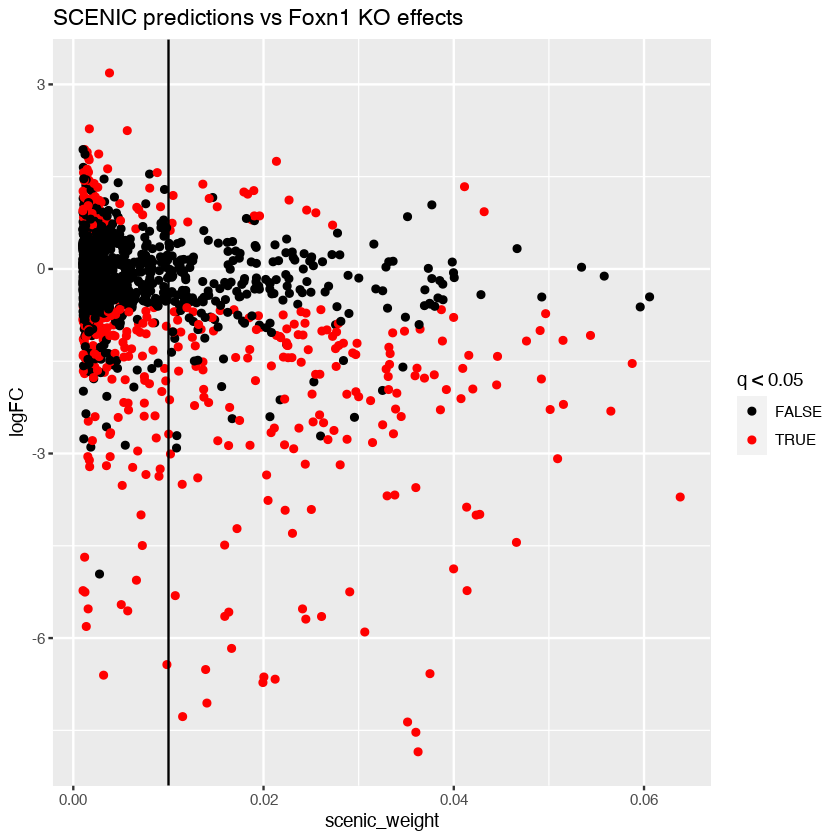

In [19]:
# Compare network with foxn1 DE
X = scenic$pharynx_atlas.csv %>% 
  subset(regulator=="Foxn1", select = c("target", "weight")) %>% 
  set_colnames(c("gene", "scenic_weight")) 
Y = merge(X, foxn1_ko, by = "gene")
head(Y)
ggplot(Y) + 
  geom_point(aes(x = scenic_weight, y = logFC, colour = q<0.05)) + 
  scale_color_manual(values = c("black", "red")) + 
  ggtitle("SCENIC predictions vs Foxn1 KO effects") + 
  geom_vline(xintercept = 0.01, color = "black")
ggsave(here("plots", "SCENIC predictions vs Foxn1 KO effects.pdf"), width = 5, height = 5)
write.csv(Y, here("plots", "SCENIC predictions vs Foxn1 KO effects.csv"))


In [20]:
scenic$pharynx_atlas_filtered.csv$regulator = gsub('-', '.', scenic$pharynx_atlas_filtered.csv$regulator)
scenic$pharynx_atlas_filtered.csv$target = gsub('-', '.', scenic$pharynx_atlas_filtered.csv$target)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


,gene,outdegree,expression,include
,<chr>,<int>,<dbl>,<lgl>
Sox6,Sox6,136,8173,TRUE
Ebf1,Ebf1,125,14814,TRUE
Nfia,Nfia,120,7468,TRUE
Zmat4,Zmat4,112,1693,TRUE
Foxn1,Foxn1,110,5649,TRUE
Hmg20b,Hmg20b,107,90818,TRUE


[1] 200   4

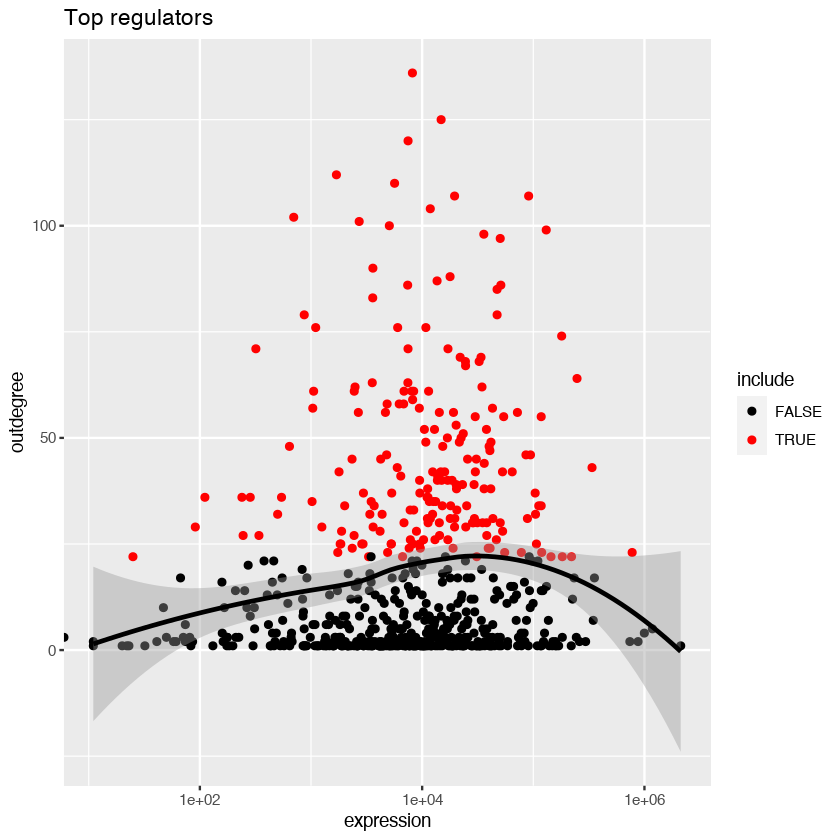

In [21]:
# Choose top regulators
regulators_all = scenic$pharynx_atlas_filtered.csv %>% 
  subset(target %in% pg) %>%
  extract2("regulator") %>% 
  table %>% 
  sort %>% 
  rev %>%
  as.data.frame(stringsAsFactors = F)
colnames(regulators_all) = c("gene", "outdegree")
rownames(regulators_all) = regulators_all$gene
regulators_all$expression = data.frame(GetAssayData(object = dge, slot = "counts"))[regulators_all$gene, ] %>% rowSums # dge@raw.data[regulators_all$gene, ] %>% rowSums
regulators_all$include = FALSE
regulators_all$include[1:200] = TRUE
ggplot(regulators_all, aes(expression, outdegree, colour = include)) + 
  geom_point() +
  geom_smooth(colour = "black") +
  scale_x_log10() + 
  scale_color_manual(values = c("black","red")) + 
  ggtitle("Top regulators")
ggsave(   here("plots", "Top regulators expression vs outdegree.pdf"), width = 5, height = 5)  
write.csv(here("plots", "Top regulators expression vs outdegree.csv"), x = regulators_all)  
regulator_data = regulators_all %>% head(200) 
head(regulator_data)
dim(regulator_data)

In [22]:
# Form graph among top regulators
hub_genes = regulator_data$gene
edge_list = scenic$pharynx_atlas_filtered.csv %>% subset(target %in% hub_genes & regulator %in% hub_genes)
edge_igraph = igraph::make_undirected_graph(
  edges = mapply(c,
                 edge_list$regulator, 
                 edge_list$target, 
                 SIMPLIFY = F) %>% Reduce(f=c))
set.seed(1) 

In [23]:
# Do force-based embedding of graph
my_layout = igraph::layout_with_fr(edge_igraph)
regulator_data[igraph::get.vertex.attribute(edge_igraph)[[1]], "fle1"] = my_layout[,1]
regulator_data[igraph::get.vertex.attribute(edge_igraph)[[1]], "fle2"] = my_layout[,2]
edge_list$x_start = regulator_data[edge_list$regulator, "fle1"]
edge_list$y_start = regulator_data[edge_list$regulator, "fle2"]
edge_list$x_end = regulator_data[edge_list$target, "fle1"]
edge_list$y_end = regulator_data[edge_list$target, "fle2"]

In [24]:
# Cluster genes into modules; export them and their targets
graph_clustering = igraph::cluster_louvain(edge_igraph)
assertthat::assert_that(is.character(graph_clustering$names))
regulator_data[graph_clustering$names, "cluster"] = LETTERS[graph_clustering$membership]
#regulator_data %<>% dplyr::arrange(cluster, desc(outdegree))
#write.csv(regulator_data,here("plots", "top_regulators.csv"))

[1] TRUE

- leiden clustering

In [25]:
adjacency_matrix <- igraph::as_adjacency_matrix(edge_igraph)

In [26]:
library(leiden)

conda environment r-reticulate installed

python modules igraph and leidenalg installed



In [27]:
partition <- leiden(adjacency_matrix,resolution_parameter = 2)

In [154]:
partition

[1] 11 11  5  5  5  5  8  8  7  7  8  8  5  8  9  9 11 11  5  5  1  1  8  5  5
 [26]  1 10  4  8  5  4  4  8  1  2  2  2  2  1 12 12  5  5  1  5  4  4  9  8  2
 [51]  2  8 12  2  2 12  5  1  1  1  1  1  2  2  2 11  6  6  4  4  8  1 10  1  6
 [76]  6  8  1  1  2  4  5 10 10  1 10  2  6 12 12  7  3  2  7  7  3  3  7  2  4
[101]  4 10 10  1  7  4  4  4  5  9  9  1  7  2  7  6  7  6  9  8  6  1  9  2  3
[126]  9  2 10  1  9  5  3  3  2  1  8  3  2  4  6  6  1  6 10  2  7  1  3  1  2
[151]  6  4  6  7  4  1  3  3  4  9 10 10  1  9  6 12  6  9  3  3  3  9  3  3  3
[176]  7  3  1 11  3  3  6 11  6  5  4  9  1  5  7  3  3  4  7  9  2  7  1  8  7

In [155]:
table(partition)

partition
 1  2  3  4  5  6  7  8  9 10 11 12 
29 23 21 19 19 17 17 15 15 11  7  7 

Warning message in brewer.pal(max(c(3, partition)), "Pastel1"):
“n too large, allowed maximum for palette Pastel1 is 9
Returning the palette you asked for with that many colors
”


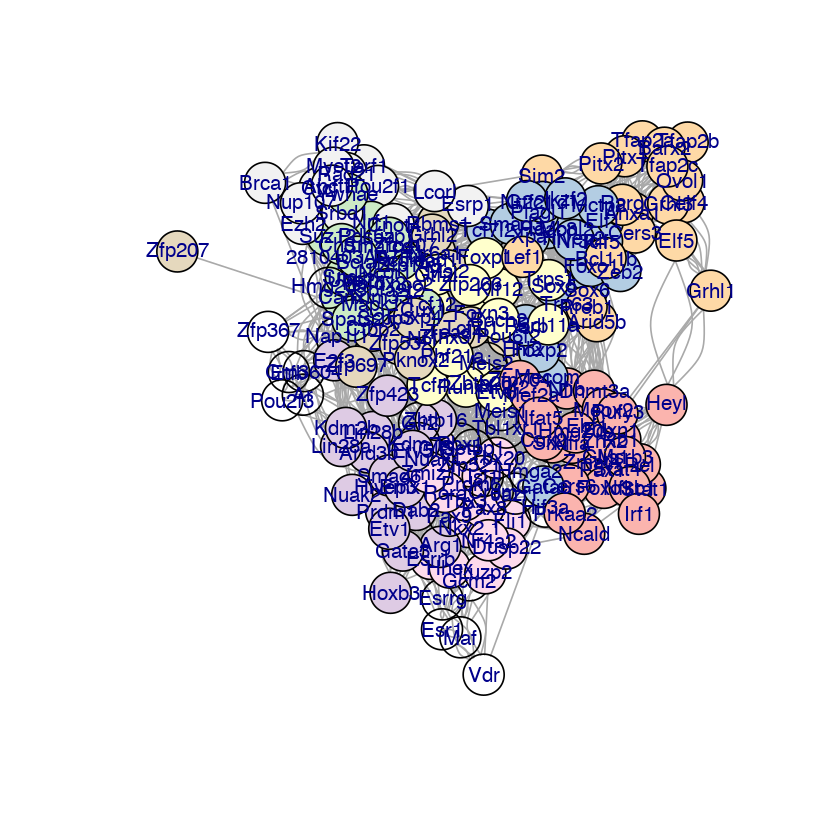

In [156]:
library("RColorBrewer")
node.cols <- brewer.pal(max(c(3, partition)),"Pastel1")[partition]
plot(edge_igraph, vertex.color = node.cols)

In [158]:
unique(partition)

[1] 11  5  8  7  9  1 10  4  2 12  6  3

In [159]:
# Cluster genes into modules; export them and their targets
# graph_clustering = igraph::cluster_louvain(edge_igraph)
# assertthat::assert_that(is.character(graph_clustering$names))
regulator_data[rownames(adjacency_matrix), "cluster_leiden"] = LETTERS[partition]
regulator_data %<>% dplyr::arrange(cluster_leiden, desc(outdegree))
write.csv(regulator_data,here("plots", "top_regulators.csv"))

In [165]:
get_cluster_for("Hhex")

[1] "H"

In [ ]:
color_scale 

In [205]:
cluster_order

[1] "K" "E" "H" "G" "I" "A" "J" "D" "B" "L" "F" "C"

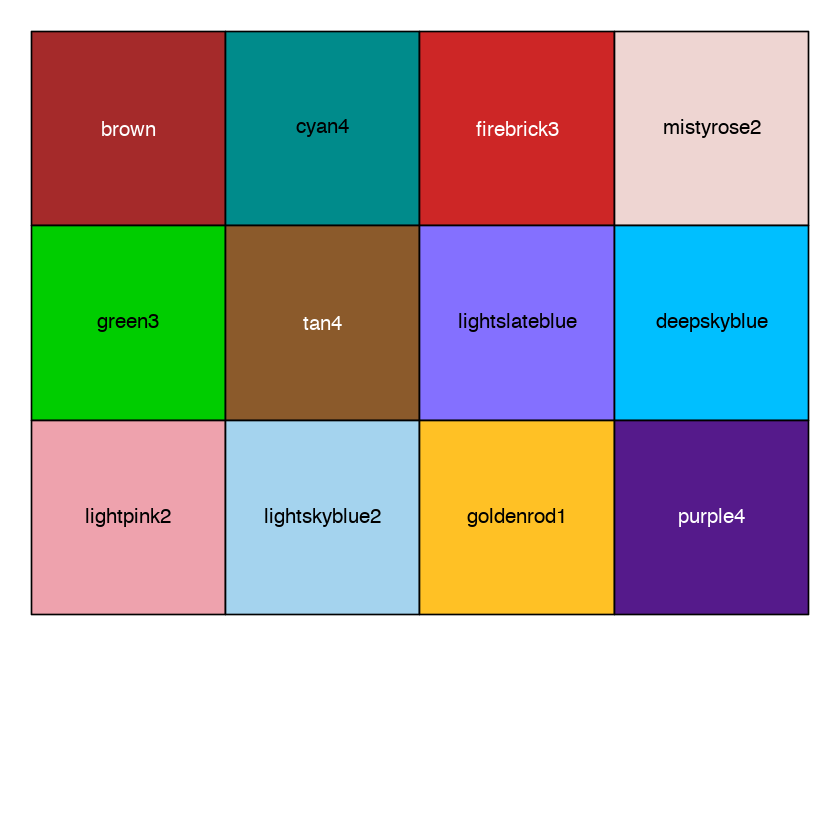

In [170]:
# Set colors for gene modules to match colors for corresponding cell types
cluster_order = LETTERS[unique(partition)]
get_cluster_for = function(my_gene) subset(regulator_data, gene==my_gene, select = "cluster_leiden", drop = T) 
get_color_for = function(my_cluster) subset(pharynx_atlas_cluster_annotation, as.numeric(ident)==my_cluster, select = "colour", drop = T) 
color_scale = rep("grey", length(unique(partition))) %>% setNames(LETTERS[1:length(unique(partition))])
color_scale[("D")] = get_color_for(13)
color_scale[("E")] = get_color_for(11)
color_scale[("B")] = get_color_for(3)
color_scale[("C")] = get_color_for(5)
color_scale[("F")] = get_color_for(10)
color_scale[("G")] = get_color_for(12)
color_scale[("I")] = get_color_for(1)
color_scale[("J")] = get_color_for(15)
color_scale[("L")] = get_color_for(7)
# color_scale[("F")] = get_color_for(22)
color_scale[get_cluster_for("Foxn1")] = get_color_for(4)
color_scale[get_cluster_for("Gcm2")] = get_color_for(26)
#color_scale[get_cluster_for("Foxa2")] = get_color_for(18)
color_scale[get_cluster_for("Hhex")] = get_color_for(22)
scales::show_col(color_scale)


In [171]:
unique(regulator_data$cluster)

[1] "B" "A" "E" "D" "C"

In [172]:
regulator_data

,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden
,<chr>,<int>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
Ebf1,Ebf1,125,14814,TRUE,-0.108262819,-4.596286,B,A
Nfia,Nfia,120,7468,TRUE,-0.375518139,-4.164387,B,A
Zmat4,Zmat4,112,1693,TRUE,-0.723002185,-4.617315,B,A
Foxn1,Foxn1,110,5649,TRUE,-0.298980271,-5.141736,B,A
Hmg20b,Hmg20b,107,90818,TRUE,-0.238281293,-4.324922,B,A
Stat4,Stat4,102,699,TRUE,-0.838624183,-5.298173,B,A
Zhx2,Zhx2,101,2713,TRUE,-0.482860021,-5.046328,B,A
Pax1,Pax1,98,35884,TRUE,-0.855288562,-4.907949,B,A
Rb1,Rb1,90,3604,TRUE,-0.537315832,-5.388958,B,A


In [173]:
expression_by_cluster = AverageExpression(dge)

Finished averaging RNA for cluster 0

Finished averaging RNA for cluster 1

Finished averaging RNA for cluster 2

Finished averaging RNA for cluster 3

Finished averaging RNA for cluster 4

Finished averaging RNA for cluster 5

Finished averaging RNA for cluster 6

Finished averaging RNA for cluster 7

Finished averaging RNA for cluster 8

Finished averaging RNA for cluster 9

Finished averaging RNA for cluster 10

Finished averaging RNA for cluster 11

Finished averaging RNA for cluster 12

Finished averaging RNA for cluster 13

Finished averaging RNA for cluster 14

Finished averaging RNA for cluster 15

Finished averaging RNA for cluster 16

Finished averaging RNA for cluster 17

Finished averaging RNA for cluster 18

Finished averaging RNA for cluster 19

Finished averaging RNA for cluster 20

Finished averaging RNA for cluster 21

Finished averaging RNA for cluster 22

Finished averaging RNA for cluster 23

Finished averaging RNA for cluster 24

Finished averaging RNA for cluster 

In [174]:
expression_by_cluster


,0,1,2,3,4,5,6,7,8,9,⋯,18,19,20,21,22,23,24,25,26,27
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xkr4,0.0012698091,0.0000000000,0.0020267481,0.0004686041,0.0006798474,0.0000000000,0.0033731820,0.0000000000,0.0004973566,0.0014507987,⋯,0.0022544017,0.000000000,0.005159016,0.0000000000,0.002962142,0.001596719,0.000000000,0.000000000,0.014442100,0.000000000
Gm1992,0.0000000000,0.0000000000,0.0000000000,0.0001836619,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
Gm37381,0.0013664545,0.0008389107,0.0004012520,0.0002250600,0.0020983800,0.0000000000,0.0004415663,0.0009902515,0.0000000000,0.0009002856,⋯,0.0000000000,0.000000000,0.002255554,0.0016193847,0.003424801,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
Rp1,0.0004130283,0.0027624914,0.0005924212,0.0000000000,0.0000000000,0.0002959034,0.0000000000,0.0000000000,0.0011822287,0.0000000000,⋯,0.0000000000,0.003122396,0.000000000,0.0033792841,0.000000000,0.002565933,0.003930842,0.000000000,0.000000000,0.000000000
Rp1.1,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
Sox17,0.0003945712,0.0171032782,0.0077382615,0.0145732319,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0498053784,0.0012984951,⋯,0.0000000000,0.002520479,0.000000000,0.0084496521,0.002811406,0.002836300,0.007465334,0.000000000,0.000000000,0.006125777
Gm37323,0.0002030409,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0007485003,0.0000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.0000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
Mrpl15,2.2250931379,3.0240681305,2.6592618711,2.3474131277,2.7491805273,2.0329418359,2.2748941943,2.3165004969,2.3280691819,2.3957187190,⋯,2.3038321050,2.476559573,2.381425561,2.8679149946,2.375910829,2.896479997,3.225304244,2.608554564,2.032747013,2.538628142
Lypla1,4.4073586536,1.7409402289,1.6876112569,1.9756549621,1.8881999912,4.5431491312,3.7107863572,4.0021759338,2.0424934936,2.0643094167,⋯,2.1973673465,2.569927225,4.445837356,2.1480609373,2.180973944,2.553558721,1.780194173,1.537181471,1.393033270,1.917025902


In [175]:
# Display candidate ranks by cluster
regulator_data$genes_ranked = regulator_data$gene %>% 
  factor(levels = regulator_data$gene)
regulator_data$total_expression = data.frame(GetAssayData(object = dge, slot = "counts"))[regulator_data$gene, ] %>% rowSums # dge@raw.data[regulator_data$gene, ] %>% rowSums
regulator_data$peak_expression = expression_by_cluster$RNA[regulator_data$gene, ] %>% apply(1, max)

In [181]:
regulator_data %<>%
  dplyr::group_by(cluster_leiden) %>%
  dplyr::mutate(rank_within_cluster = rank(outdegree, ties.method = "first")) %>%
  dplyr::ungroup() %>%
  dplyr::mutate(x_position = order(order(cluster_leiden, rank_within_cluster)))

In [258]:
regulator_data %<>%
  dplyr::group_by(cluster_leiden) %>%
  dplyr::mutate(rank_within_cluster_actual = rank(-outdegree, ties.method = "first")) %>%
  dplyr::ungroup() # %>%
  # dplyr::mutate(x_position = order(order(cluster_leiden, rank_within_cluster)))

In [212]:
regulator_data

X,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden,genes_ranked,total_expression,peak_expression,rank_within_cluster,x_position,label,rank_within_cluster_actual
<int>,<fct>,<int>,<int>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<int>
1,Ebf1,125,14814,TRUE,-0.108262819,-4.596286,B,A,Ebf1,14814,6.8292508,29,29,Ebf1,1
2,Nfia,120,7468,TRUE,-0.375518139,-4.164387,B,A,Nfia,7468,2.0752214,28,28,Nfia,2
3,Zmat4,112,1693,TRUE,-0.723002185,-4.617315,B,A,Zmat4,1693,0.3874803,27,27,Zmat4,3
4,Foxn1,110,5649,TRUE,-0.298980271,-5.141736,B,A,Foxn1,5649,3.3654451,26,26,Foxn1,4
5,Hmg20b,107,90818,TRUE,-0.238281293,-4.324922,B,A,Hmg20b,90818,14.6156770,25,25,Hmg20b,5
6,Stat4,102,699,TRUE,-0.838624183,-5.298173,B,A,Stat4,699,0.4382725,24,24,Stat4,6
7,Zhx2,101,2713,TRUE,-0.482860021,-5.046328,B,A,Zhx2,2713,0.2847669,23,23,Zhx2,7
8,Pax1,98,35884,TRUE,-0.855288562,-4.907949,B,A,Pax1,35884,8.4633010,22,22,Pax1,8
9,Rb1,90,3604,TRUE,-0.537315832,-5.388958,B,A,Rb1,3604,0.5442916,21,21,Rb1,9


In [195]:
plot_data = regulator_data %>% subset(cluster_leiden %in% c("A","H","K"))

In [201]:
plot_data %>% subset(rank_within_cluster %in% c(1,2,3,4,5))

,X,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden,genes_ranked,total_expression,peak_expression,rank_within_cluster,x_position,label
,<int>,<fct>,<int>,<int>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>
25,25,Zfp704,31,19672,TRUE,0.82917864,-3.1142258,B,A,Zfp704,19672,1.5211486,5,5,Zfp704
26,26,Meox2,29,1252,TRUE,0.05712722,-4.9533335,B,A,Meox2,1252,0.2376901,4,4,Meox2
27,27,Ncald,25,2939,TRUE,-2.00993346,-4.2552261,B,A,Ncald,2939,0.5133053,3,3,Ncald
28,28,Irf1,23,1741,TRUE,-1.83762712,-5.5802385,B,A,Irf1,1741,0.5821868,2,2,Irf1
29,29,Prkaa2,22,3298,TRUE,-1.62009172,-3.8489274,B,A,Prkaa2,3298,0.3748725,1,1,Prkaa2
156,156,Hhex,33,20507,TRUE,-2.23684513,-1.2678563,D,H,Hhex,20507,42.8425553,4,149,Hhex
157,157,Dusp22,33,7798,TRUE,-2.04100546,-2.4095229,D,H,Dusp22,7798,0.9713780,5,150,Dusp22
158,158,Rora,32,3384,TRUE,-0.89347364,-1.0849506,D,H,Rora,3384,0.5050471,3,148,Rora
159,159,Tbx20,27,340,TRUE,-0.29851607,-2.2336625,D,H,Tbx20,340,0.1735177,2,147,Tbx20


In [205]:
subset(plot_data, rank_within_cluster<=5)

,X,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden,genes_ranked,total_expression,peak_expression,rank_within_cluster,x_position,label
,<int>,<fct>,<int>,<int>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>
25,25,Zfp704,31,19672,TRUE,0.82917864,-3.1142258,B,A,Zfp704,19672,1.5211486,5,5,Zfp704
26,26,Meox2,29,1252,TRUE,0.05712722,-4.9533335,B,A,Meox2,1252,0.2376901,4,4,Meox2
27,27,Ncald,25,2939,TRUE,-2.00993346,-4.2552261,B,A,Ncald,2939,0.5133053,3,3,Ncald
28,28,Irf1,23,1741,TRUE,-1.83762712,-5.5802385,B,A,Irf1,1741,0.5821868,2,2,Irf1
29,29,Prkaa2,22,3298,TRUE,-1.62009172,-3.8489274,B,A,Prkaa2,3298,0.3748725,1,1,Prkaa2
156,156,Hhex,33,20507,TRUE,-2.23684513,-1.2678563,D,H,Hhex,20507,42.8425553,4,149,Hhex
157,157,Dusp22,33,7798,TRUE,-2.04100546,-2.4095229,D,H,Dusp22,7798,0.9713780,5,150,Dusp22
158,158,Rora,32,3384,TRUE,-0.89347364,-1.0849506,D,H,Rora,3384,0.5050471,3,148,Rora
159,159,Tbx20,27,340,TRUE,-0.29851607,-2.2336625,D,H,Tbx20,340,0.1735177,2,147,Tbx20


In [206]:
regulator_data

X,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden,genes_ranked,total_expression,peak_expression,rank_within_cluster,x_position,label
<int>,<fct>,<int>,<int>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>
1,Ebf1,125,14814,TRUE,-0.108262819,-4.596286,B,A,Ebf1,14814,6.8292508,29,29,Ebf1
2,Nfia,120,7468,TRUE,-0.375518139,-4.164387,B,A,Nfia,7468,2.0752214,28,28,Nfia
3,Zmat4,112,1693,TRUE,-0.723002185,-4.617315,B,A,Zmat4,1693,0.3874803,27,27,Zmat4
4,Foxn1,110,5649,TRUE,-0.298980271,-5.141736,B,A,Foxn1,5649,3.3654451,26,26,Foxn1
5,Hmg20b,107,90818,TRUE,-0.238281293,-4.324922,B,A,Hmg20b,90818,14.6156770,25,25,Hmg20b
6,Stat4,102,699,TRUE,-0.838624183,-5.298173,B,A,Stat4,699,0.4382725,24,24,Stat4
7,Zhx2,101,2713,TRUE,-0.482860021,-5.046328,B,A,Zhx2,2713,0.2847669,23,23,Zhx2
8,Pax1,98,35884,TRUE,-0.855288562,-4.907949,B,A,Pax1,35884,8.4633010,22,22,Pax1
9,Rb1,90,3604,TRUE,-0.537315832,-5.388958,B,A,Rb1,3604,0.5442916,21,21,Rb1


In [208]:
plot_data$x_position %>% rank

[1] 29 28 27 26 25 24 23 22 21 20 19 18 17 15 16 14 13 12 11 10  9  8  7  6  5
[26]  4  3  2  1 44 43 42 41 40 39 38 37 36 35 33 34 32 31 30 51 49 50 48 47 45
[51] 46

In [230]:
to_label = as.vector(plot_data[plot_data$rank_within_cluster_actual <=5,]$label)

In [238]:
plot_data

X,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden,genes_ranked,total_expression,peak_expression,rank_within_cluster,x_position,label,rank_within_cluster_actual
<int>,<fct>,<int>,<int>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<int>
1,Ebf1,125,14814,TRUE,-0.108262819,-4.5962862,B,A,Ebf1,14814,6.82925083,29,29,Ebf1,1
2,Nfia,120,7468,TRUE,-0.375518139,-4.1643874,B,A,Nfia,7468,2.07522136,28,28,Nfia,2
3,Zmat4,112,1693,TRUE,-0.723002185,-4.6173149,B,A,Zmat4,1693,0.38748026,27,27,Zmat4,3
4,Foxn1,110,5649,TRUE,-0.298980271,-5.1417361,B,A,Foxn1,5649,3.36544513,26,26,Foxn1,4
5,Hmg20b,107,90818,TRUE,-0.238281293,-4.3249219,B,A,Hmg20b,90818,14.61567703,25,25,Hmg20b,5
6,Stat4,102,699,TRUE,-0.838624183,-5.2981726,B,A,Stat4,699,0.43827254,24,24,Stat4,6
7,Zhx2,101,2713,TRUE,-0.482860021,-5.0463284,B,A,Zhx2,2713,0.28476686,23,23,Zhx2,7
8,Pax1,98,35884,TRUE,-0.855288562,-4.9079489,B,A,Pax1,35884,8.46330098,22,22,Pax1,8
9,Rb1,90,3604,TRUE,-0.537315832,-5.3889582,B,A,Rb1,3604,0.54429164,21,21,Rb1,9


In [259]:
regulator_data$label = regulator_data$gene
plot_data = regulator_data %>% subset(cluster_leiden %in% c("A","H","K"))

In [260]:
plot_data

X,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden,genes_ranked,total_expression,peak_expression,rank_within_cluster,x_position,label,rank_within_cluster_actual
<int>,<fct>,<int>,<int>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<int>
1,Ebf1,125,14814,TRUE,-0.108262819,-4.5962862,B,A,Ebf1,14814,6.82925083,29,29,Ebf1,1
2,Nfia,120,7468,TRUE,-0.375518139,-4.1643874,B,A,Nfia,7468,2.07522136,28,28,Nfia,2
3,Zmat4,112,1693,TRUE,-0.723002185,-4.6173149,B,A,Zmat4,1693,0.38748026,27,27,Zmat4,3
4,Foxn1,110,5649,TRUE,-0.298980271,-5.1417361,B,A,Foxn1,5649,3.36544513,26,26,Foxn1,4
5,Hmg20b,107,90818,TRUE,-0.238281293,-4.3249219,B,A,Hmg20b,90818,14.61567703,25,25,Hmg20b,5
6,Stat4,102,699,TRUE,-0.838624183,-5.2981726,B,A,Stat4,699,0.43827254,24,24,Stat4,6
7,Zhx2,101,2713,TRUE,-0.482860021,-5.0463284,B,A,Zhx2,2713,0.28476686,23,23,Zhx2,7
8,Pax1,98,35884,TRUE,-0.855288562,-4.9079489,B,A,Pax1,35884,8.46330098,22,22,Pax1,8
9,Rb1,90,3604,TRUE,-0.537315832,-5.3889582,B,A,Rb1,3604,0.54429164,21,21,Rb1,9


In [ ]:
regulator_data$label = regulator_data$gene
plot_data = regulator_data %>% subset(cluster_leiden %in% c("A","H","K"))
# label_data = plot_data %>% subset(rank_within_cluster %in% c(1,2,3,4,5))
ggplot(plot_data) + 
  geom_bar(aes(x = x_position %>% rank,
               y = outdegree,
               fill = as.character(cluster_leiden)), stat = "identity") + 
  geom_text( data = plot_data, aes(x = x_position %>% rank, y = -max(outdegree)/5, label = label), hjust = 1) +
  expand_limits(y = -100) + 
  scale_fill_manual(values = color_scale) + 
  coord_flip()
ggsave(here("plots", "Fig3c.pdf"), width = 10, height = 50,limitsize = FALSE)

In [236]:
length(to_label)

[1] 60

Warning message:
“Ignoring unknown aesthetics: label”


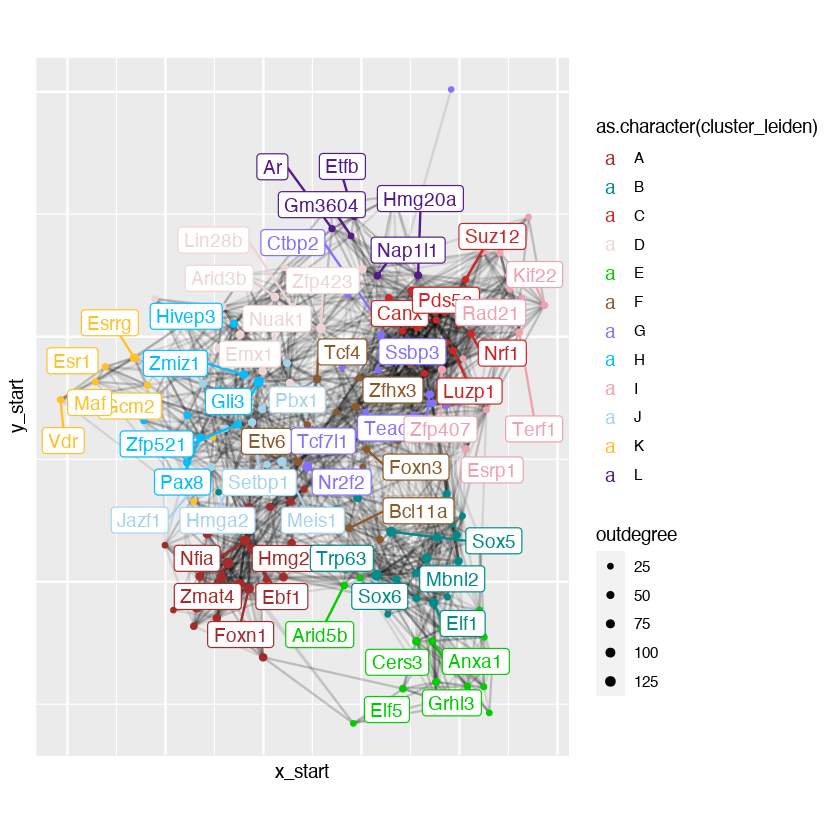

In [262]:
to_label = as.vector(regulator_data[regulator_data$rank_within_cluster_actual <=5,]$label)
ggplot() + 
  geom_segment(data = edge_list,
               alpha = 0.1,
               mapping = aes(x = x_start, 
                             y = y_start, 
                             xend = x_end, 
                             yend = y_end)) + 
  geom_point(
    data = regulator_data, 
    mapping = aes(x = fle1, y = fle2, 
                  colour = as.character(cluster_leiden),
                  label = gene, 
                  size = outdegree)
  ) + 
  ggrepel::geom_label_repel(
    data = regulator_data %>% subset(label %in% to_label), #size=10,
    mapping = aes(x = fle1, y = fle2, 
                  colour = as.character(cluster_leiden),
                  label = gene),max.overlaps=Inf
  )  + 
  scale_colour_manual(values = color_scale) + 
  scale_fill_manual(values = color_scale)  + 
  scale_size_area(max_size = 2)  + 
  coord_fixed() + 
  theme(axis.line = element_blank(), 
        axis.ticks = element_blank(), 
        axis.text = element_blank())
ggsave(here("plots", "top_regulators_by_fle.pdf"), width = 8, height = 8,limitsize = FALSE)

In [202]:
write.csv(regulator_data,"regulator_info.csv")

In [203]:
regulator_data = read.csv("regulator_info.csv")

In [204]:
regulator_data

X,gene,outdegree,expression,include,fle1,fle2,cluster,cluster_leiden,genes_ranked,total_expression,peak_expression,rank_within_cluster,x_position,label
<int>,<fct>,<int>,<int>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>
1,Ebf1,125,14814,TRUE,-0.108262819,-4.596286,B,A,Ebf1,14814,6.8292508,29,29,Ebf1
2,Nfia,120,7468,TRUE,-0.375518139,-4.164387,B,A,Nfia,7468,2.0752214,28,28,Nfia
3,Zmat4,112,1693,TRUE,-0.723002185,-4.617315,B,A,Zmat4,1693,0.3874803,27,27,Zmat4
4,Foxn1,110,5649,TRUE,-0.298980271,-5.141736,B,A,Foxn1,5649,3.3654451,26,26,Foxn1
5,Hmg20b,107,90818,TRUE,-0.238281293,-4.324922,B,A,Hmg20b,90818,14.6156770,25,25,Hmg20b
6,Stat4,102,699,TRUE,-0.838624183,-5.298173,B,A,Stat4,699,0.4382725,24,24,Stat4
7,Zhx2,101,2713,TRUE,-0.482860021,-5.046328,B,A,Zhx2,2713,0.2847669,23,23,Zhx2
8,Pax1,98,35884,TRUE,-0.855288562,-4.907949,B,A,Pax1,35884,8.4633010,22,22,Pax1
9,Rb1,90,3604,TRUE,-0.537315832,-5.388958,B,A,Rb1,3604,0.5442916,21,21,Rb1


- ran Fig 4d on different version of R, Seurat